In [1]:
import pandas as pd
import time
import seaborn as sns
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle
import sys
sys.path.append('/Users/milo1226/Desktop/7_python_projects/KerbalSpaceProgram/')
import AirResistanceModule as Arm
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt  # To visualize


%matplotlib inline

In [2]:
with open('/Users/milo1226/Desktop/7_python_projects/KerbalSpaceProgram/kerbin_atm_readings_07312021_164715.pkl', 'rb') as f:
    atm = pickle.load(f)

In [3]:
kerbin_atm = pd.DataFrame(atm[1:], columns =atm[0])

In [6]:
kerbin_atm = kerbin_atm[['altitude(m)','density(kg/m^3)','temperature(K)','pressure(Pascals)']]
kerbin_atm = kerbin_atm.iloc[::-1]
kerbin_atm.tail()

,altitude(m),density(kg/m^3),temperature(K),pressure(Pascals)
4,87713.416854,0.0,4.0,0.0
3,87901.040296,0.0,4.0,0.0
2,88086.989709,0.0,4.0,0.0
1,88270.207611,0.0,4.0,0.0
0,88962.799095,0.0,4.0,0.0


/Users/milo1226/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


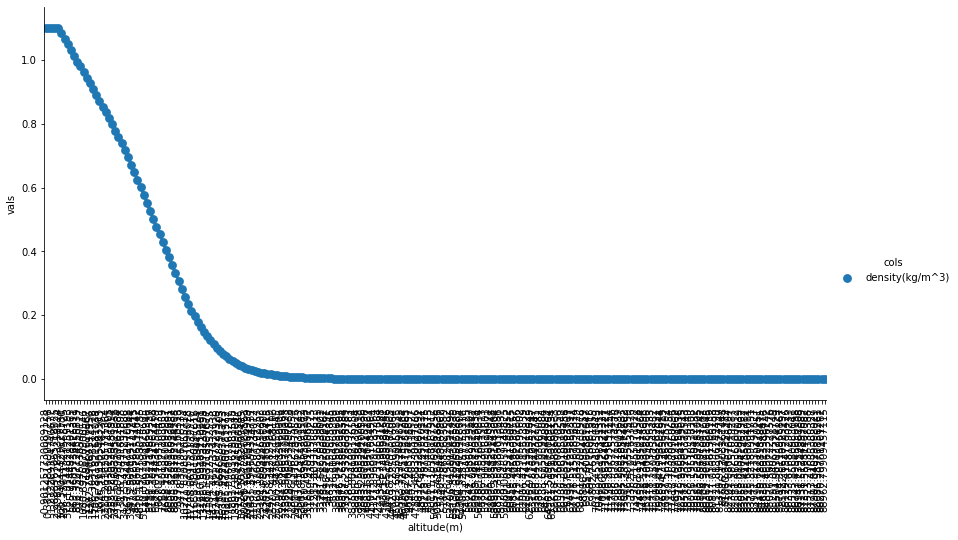

In [18]:
result_melted = kerbin_atm[['altitude(m)','density(kg/m^3)']].melt('altitude(m)', var_name='cols',  value_name='vals')
g = sns.factorplot(x="altitude(m)", y="vals", hue='cols', data=result_melted, height=6, aspect=2)
g.set_xticklabels(rotation=90)

/Users/milo1226/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


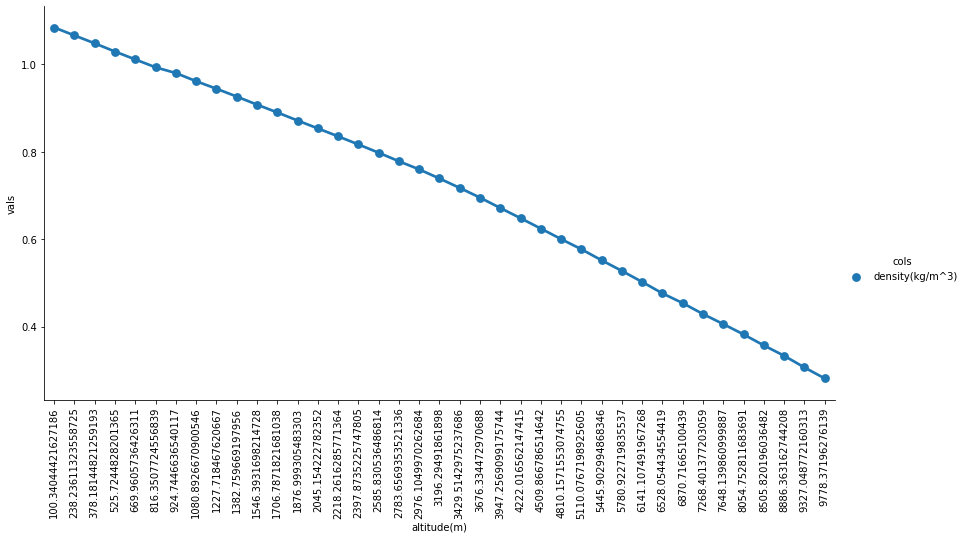

In [19]:
kerbin_atm[['altitude(m)','density(kg/m^3)']]
fkerbin_atm = kerbin_atm[(kerbin_atm['altitude(m)'] < 10000) & (kerbin_atm['altitude(m)'] > 10)]
fkerbin_atm = fkerbin_atm[['altitude(m)','density(kg/m^3)']]
fkerbin_atm_melted = fkerbin_atm.melt('altitude(m)', var_name='cols',  value_name='vals')
s = sns.factorplot(x="altitude(m)", y="vals", hue='cols', data=fkerbin_atm_melted, height=6, aspect=2)
s.set_xticklabels(rotation=90)

In [10]:
X = fkerbin_atm['altitude(m)'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = fkerbin_atm['density(kg/m^3)'].values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

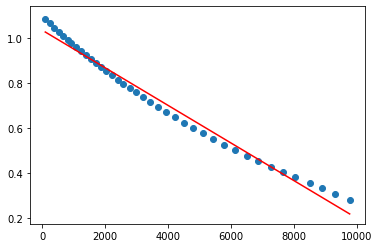

In [11]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [15]:
linear_regressor.coef_

array([[-8.35814718e-05]])

In [22]:
kerbin_atm[['altitude(m)','density(kg/m^3)','pressure(Pascals)']]

,altitude(m),density(kg/m^3),pressure(Pascals)
270,0.389548,1.098632,98388.875000
269,0.389548,1.098632,98388.875000
268,0.389548,1.098632,98388.875000
267,0.389548,1.098632,98388.875000
266,0.389548,1.098632,98388.875000
265,0.389548,1.098632,98388.875000
264,0.389548,1.098632,98388.875000
263,0.389548,1.098632,98388.875000
262,0.389548,1.098632,98388.875000
261,0.389548,1.098632,98388.875000


/Users/milo1226/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


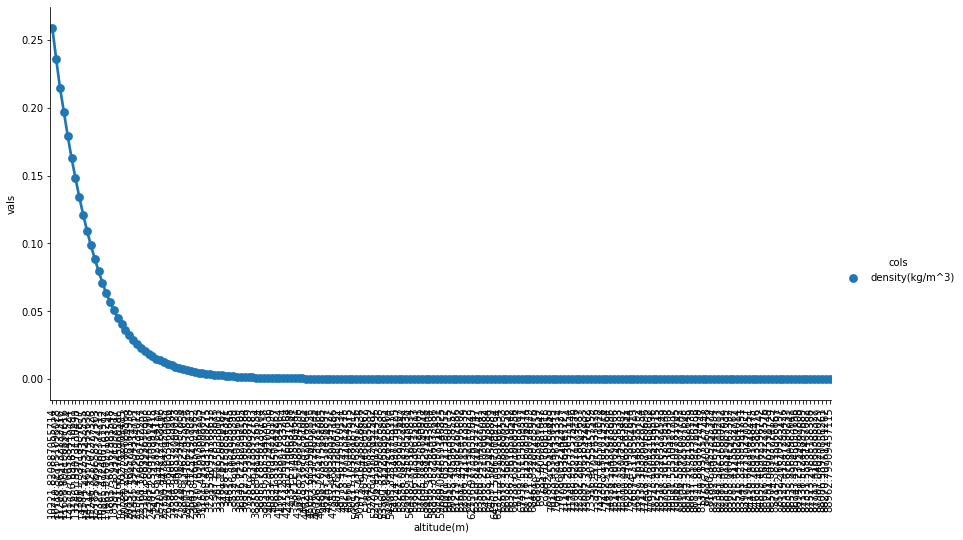

In [27]:
kerbin_atm_above = kerbin_atm[(kerbin_atm['altitude(m)'] > 10000)]
result_above_ten_melted = kerbin_atm_above[['altitude(m)','density(kg/m^3)']].melt('altitude(m)', var_name='cols',  value_name='vals')
above_ten_graph = sns.factorplot(x="altitude(m)", y="vals", hue='cols', data=result_above_ten_melted, height=6, aspect=2)
above_ten_graph.set_xticklabels(rotation=90)